# The integrate and fire neuron

In this notebook we will use Python to simulate the integrate and fire (I&F) neuron model.  We'll investigate, in particular, how the spiking activity varies as we adjust the input current $I$.

# Background information about the I&F model

Here's a video that describes a slightly more complicated model, the *leaky* integrate and fire model.

In [1]:
from IPython.lib.display import VimeoVideo
VimeoVideo('140084447')

Here's some additional intereting videos and references:

- [Lecture by Prof. Gerstner](http://klewel.com/conferences/epfl-neural-networks/index.php?talkID=1)

##  Preliminaries
Before beginning, let's load in the Python packages we'll need:

In [2]:
from pylab import *
%matplotlib inline
rcParams['figure.figsize']=(12,3)                # Change the default figure size

##  Part 1:  Numerical solutions - Introduction

 
How do we compute a numerical solution to the integrate and fire model?
  The basic idea is to rearrange the differential equation to get $V(t+1)$ on
  the left hand side, and $V(t)$ on the right hand side.  Then, if we know
  what's happening at time $t$, we can solve for what's happening at time $t+1$.

For example, consider the differential equation:

$$
  \dfrac{dV}{dt} = \dfrac{I}{C}
$$

In words, we can think of:

$dV$ as the "change in voltage V",

$dt$ as the "change in time t".

Let's consider the case that we record the voltage $V$ in discrete time steps. So
we observe:

$V[0], V[1], V[2], \ldots$

at times:

$dt, \, 2*dt, \, 3*dt, \ldots$

where $dt$ is the time between our samples of $V$.

We can now write the "change in voltage V" as:

$$
  dV = V(t+1) - V(t)
$$

Notice that the change in voltage is the difference in V between two
sequential time samples.  Now, let's rewrite $\dfrac{dV}{dt}$ as,

$$
  \dfrac{dV}{dt} = \dfrac{ V(t+1) - V(t) }{ dt } 
$$

where we've replaced $dV$.  Now, let's substitute this expression into the equation at the top of this file:

$$
  \dfrac{ V(t+1) - V(t) }{ dt } = \dfrac{I}{C}.  
$$

Solving this equation for $V(t+1)$ you'll find  that:

$$
  V(t+1) = V(t) + dt*(I/C)
$$

Notice that, in this expression, we use our current value of the voltage V(t) and the model (I/C) to determine the next value of the voltage V(t+1).

Now, let's program this equation in Python.  First, let's set the values
for the parameters $I$ and $C$.

In [3]:
C=1.0
I=1.0

  We also need to set the value for $dt$.  This defines the time step for our
  model.  We must choose it small enough so that we don't miss anything
  interesting.  We'll choose:

In [4]:
dt=0.01

Let's assume the units of time are seconds.  So, we step forward in time by $0.01$ s.

The right hand side of our equation is nearly defined, but we're still missing one thing, $V(t)$.

<div class="question">

**Q:**  What value do we assign to $V(t)$?

**A:**  We don't know --- that's why we're running the simulation in the first place!

</div>

So here's an easier question:  what *initial* value do we assign to $V(t)$?
 
 To start, we'll create an array of zeros to hold our results for $V$:

In [5]:
V = zeros([1000,1])
V.shape

(1000, 1)

This array `V` consists of 1000 rows and 1 column. We can think of each row entry as corresponding to a discrete step in time. Our goal is to fill-in the values of `V` (i.e., step forward in time), in a way consistent with our model.

Let's choose an initial value for `V` of 0.2, which in our simple model we'll assume represents the rest state.

In [6]:
V[0]=0.2

<div class="question">

**Q:**  Given the initial state `V[0]=0.2`, calculate `V[1]`.  Then calcualte `V[2]`.

</div>

  After the two calculations above, we've moved forward two time steps into
  the future, from $t=0$ s to $t=0.01$ s, and then from $t=0.01$ s to $t=0.02$ s.  But what
  if we want to know $V$ at $t=10$ s?  Then, this iteration-by-hand procedure becomes
  much too boring and error-prone.  So, what do we do?  Let's make the
  computer do it ...

## Part 2:  Numerical solutions - implementation

Let's computerize this iteration-by-hand procedure to find `V[999]`. To do so, we'll use a [for-loop](https://wiki.python.org/moin/ForLoop).  Here's what it looks like:

In [7]:
for k in range(1,999):
    V[k+1] = V[k] + dt*(I/C)

<div class="question">

**Q:**  Does this loop make sense?  Describe what's happening here.

</div>

<div class="question">

**Q:**  Why does the `range` command end at `999`?

</div>

Execute this for-loop and examine the results in vector `V`.  To do so, let's plot `V`:

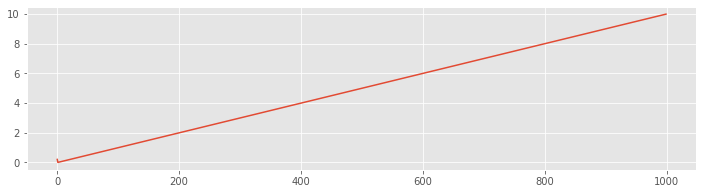

In [8]:
figure()
plot(V);

<div class="question">

**Q:**  What happens to the voltage after 1000 steps?

</div>

  This plot is informative, but not great.  Really, we'd like to plot the
  voltage as a function of *time*, not steps or indices.  To do so, we
  need to define a time axis:

In [9]:
t = arange(0,len(V))*dt

<div class="question">

**Q:**  What's happening in the command above?  Does it make sense?  (If not, trying printing or plotting `t`.)

</div>

Now, with *time* defined, let's redo the plot of the voltage with the axes labeled appropriately.

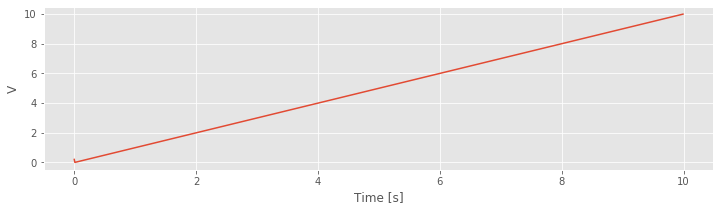

In [10]:
figure()
plot(t,V)
xlabel('Time [s]');
ylabel('V');

Finally, let's put it all together . . .

## Part 3: I&F CODE (version 1)

  In Parts 1 and 2, we constructed parts of the I&F model in bits-and-pieces.
  Let's now collect all of this code, compute a numerical solution to
  the I&F model, and plot the results (with appropriate axes).

First, let's clear all the variables:

In [11]:
%reset

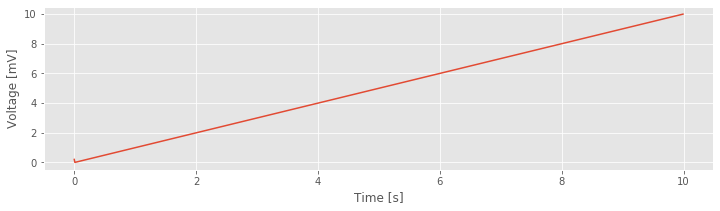

In [12]:
from pylab import *
%matplotlib inline
rcParams['figure.figsize']=(12,3)# Change the default figure size

I=1                              #Set the parameter I.
C=1                              #Set the parameter C.
dt=0.01                          #Set the timestep.
V = zeros([1000,1])              #Initialize V.
V[0]=0.2;                        #Set the initial value of V.

for k in range(1,999):           #March forward in time,
    V[k+1] = V[k] + dt*(I/C)     #... updating V along the way.

t = arange(0,len(V))*dt          #Define the time axis.

figure()                         #Plot the results.
plot(t,V)
xlabel('Time [s]')
ylabel('Voltage [mV]');

<div class="question">

**Q:**  Adjust the parameter `I`.  What happens to `V` if `I=0`?  Can you set `I` so that `V` > 20 within 10 s?

</div>

## Part 4:  Voltage threshold

  Notice, our model is missing something important:  **the reset**.
  Without
  the reset, the voltage increases forever (if $I>0$). Now, let's update
  our model to include the reset.  To do so, we'll need to add two things
  to our code.
  
  - First, we'll define the voltage threshold `Vth`, and
  reset voltage `Vreset`.
  - Second, we'll check to see if `V` exceeds
  `Vth` using an [if-statement](https://docs.python.org/3/tutorial/controlflow.html);  if it does, then we'll set `V` equal to
  `Vreset`.
  
Here's what we'll add to the code:

In [13]:
Vth = 1;        #Define the voltage threshold.
Vreset = 0;     #Define the reset voltage.

for k in range(1,999):            #March forward in time,
    V[k+1] = V[k] + dt*(I/C)      #Update the voltage,
    if V[k+1] > Vth:              #... and check if the voltage exceeds the threshold.
        V[k+1] = Vreset

## Part 5: I&F CODE (version 2)

Now, let's put it all together to make a complete I&F model (with a thershold and reset), simulate it, and plot the result.

In [14]:
%reset

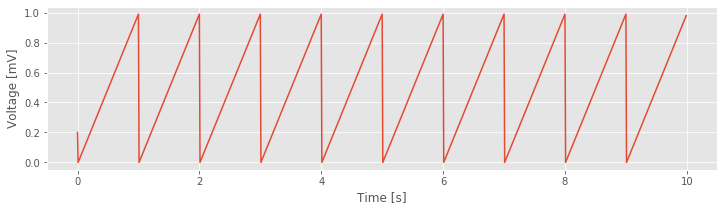

In [15]:
from pylab import *
%matplotlib inline
rcParams['figure.figsize']=(12,3) # Change the default figure size

I=1                          #Set the parameter I.
C=1                          #Set the parameter C.
Vth = 1;                     #Define the voltage threshold.
Vreset = 0;                  #Define the reset voltage.
dt=0.01                      #Set the timestep.
V = zeros([1000,1])          #Initialize V.
V[0]=0.2;                    #Set the initial condition.

for k in range(1,999):       #March forward in time,
    V[k+1] = V[k] + dt*(I/C) #Update the voltage,
    if V[k+1] > Vth:         #... and check if the voltage exceeds the threshold.
        V[k+1] = Vreset
        
t = arange(0,len(V))*dt      #Define the time axis.

figure()                     #Plot the results.
plot(t,V)
xlabel('Time [s]')
ylabel('Voltage [mV]');

<div class="question">

**Q:** Adjust the parameter `I`.  What happens to `V` if `I=10`?  If `I=100`?

</div>

<div class="question">

**Q:** Adjust the parameter `C`.  What happens to `V` if `C=0.1`?  If `C=10`?

</div>

<div class="question">

**Q:** What is "spiking" in this I&F model?

</div>